# Word Sense Disambiguation (снятие лексической неоднозначности слов) и Word Sense Induction (нахождение значений слова)

WSD и WSI  - это связанные задачи про определение значений, в которых употребляются слова. WSI занимается определением возможных значений слова, а WSD нужна для того, чтобы определить, в каком из имеющихся значений слово употреблено в тексте. 

Основное предположение, на котором строятся все модели для снятия и определения неоднозначности - значение определяется в контексте. 

На практике WSD/WSI применяются достаточно редко. Современные модели (вроде BERT) используют фиксированные эмбединги для отдельных слов и преобразуют их в зависимости от контекста. Преобразованные (контекстуализированные) эмбединги удобно использовать для предсказания (именованных сущностей, частей речи, перевода), но из них нельзя вытащить информацию о том, сколько значений есть у слова. А это может требоваться в специфичных лингвистических задачах.   

Для нас WSD и WSI удобны тем, что на их примере можно познакомится с важными методами и инструментами.

# WSD

## WordNet

Выводить значения просто из текста тяжело, поэтому можно попробовать воспользоваться словарями (wsi сделанное людьми). Самый известный такой словарь - WordNet (https://wordnet.princeton.edu/), который есть в nltk. Для русского есть https://ruwordnet.ru/ru , но он конечно попроще и данные нужно запрашивать.

WordNet - это лексическая база данных, где существительные, прилагательные и глаголы английского сгруппированы в синонимические множества. К тому же между ними установлены связи (гипонимия, гипоронимия, миронимия и т.п.).

In [1]:
# запустите если не установлен ворднет
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mnefedov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import wordnet as wn

Синонимичные множества в WordNet'е коротко называются синсеты. 

In [3]:
# всего синсетов
len(list(wn.all_synsets()))

117659

Из них существительных:

In [4]:
len(list(wn.all_synsets('n')))

82115

А глаголов:

In [5]:
len(list(wn.all_synsets('v')))

13767

А прилагательных:

In [6]:
len(list(wn.all_synsets('a')))

18156

Синсеты для слова можно достать вот так:

In [29]:
# это все значения, которые соответствуют такой словоформе
wn.synsets('go')

[Synset('go.n.01'),
 Synset('adam.n.03'),
 Synset('crack.n.09'),
 Synset('go.n.04'),
 Synset('travel.v.01'),
 Synset('go.v.02'),
 Synset('go.v.03'),
 Synset('become.v.01'),
 Synset('go.v.05'),
 Synset('run.v.05'),
 Synset('run.v.03'),
 Synset('proceed.v.04'),
 Synset('go.v.09'),
 Synset('go.v.10'),
 Synset('sound.v.02'),
 Synset('function.v.01'),
 Synset('run_low.v.01'),
 Synset('move.v.13'),
 Synset('survive.v.01'),
 Synset('go.v.16'),
 Synset('die.v.01'),
 Synset('belong.v.03'),
 Synset('go.v.19'),
 Synset('start.v.09'),
 Synset('move.v.15'),
 Synset('go.v.22'),
 Synset('go.v.23'),
 Synset('blend.v.02'),
 Synset('go.v.25'),
 Synset('fit.v.02'),
 Synset('rifle.v.02'),
 Synset('go.v.28'),
 Synset('plump.v.04'),
 Synset('fail.v.04'),
 Synset('go.a.01')]

Можно ограничить часть речи:

In [ ]:
wn.synsets('go', pos='v')

[Synset('travel.v.01'),
 Synset('go.v.02'),
 Synset('go.v.03'),
 Synset('become.v.01'),
 Synset('go.v.05'),
 Synset('run.v.05'),
 Synset('run.v.03'),
 Synset('proceed.v.04'),
 Synset('go.v.09'),
 Synset('go.v.10'),
 Synset('sound.v.02'),
 Synset('function.v.01'),
 Synset('run_low.v.01'),
 Synset('move.v.13'),
 Synset('survive.v.01'),
 Synset('go.v.16'),
 Synset('die.v.01'),
 Synset('belong.v.03'),
 Synset('go.v.19'),
 Synset('start.v.09'),
 Synset('move.v.15'),
 Synset('go.v.22'),
 Synset('go.v.23'),
 Synset('blend.v.02'),
 Synset('go.v.25'),
 Synset('fit.v.02'),
 Synset('rifle.v.02'),
 Synset('go.v.28'),
 Synset('plump.v.04'),
 Synset('fail.v.04')]

У синсета есть уникальное имя (или скорее тэг). Но внутри синсета сгрупированны разные слова. В тэге используется какое-то одно из этих слов (наиболее репрезентативное).  Поэтому в списке выше можно увидеть не только синсеты с именем `go.x.x`. Если взять какой-нибудь синсет и посмотреть на леммы которые ему соответствуют, то там уже можно будет увидеть `go`. 

In [30]:
ss_list = wn.synsets('go', pos='v')
ss = ss_list[0]
ss.name()

'travel.v.01'

In [35]:
# go тут второй поэтому такой синсет и находится в запросе выше
[l.name() for l in ss.lemmas()]

['travel', 'go', 'move', 'locomote']

Удобнее посмотреть на составляющие синсета вот так:

In [37]:
# длина совпадает с длиной wn.synsets("car")
# то есть каждый список соответствует значению/синсету
# каждый список это слова синонимичные в каком-то из их значений
wn.synonyms('car')

[['auto', 'automobile', 'machine', 'motorcar'],
 ['railcar', 'railroad_car', 'railway_car'],
 ['gondola'],
 ['elevator_car'],
 ['cable_car']]

In [38]:
# другой пример
# пустой список означает, что для этого значения
# взаимозаменяемых синонимов нет
wn.synonyms('go')

[['spell', 'tour', 'turn'],
 ['Adam', 'X', 'XTC', 'cristal', 'disco_biscuit', 'ecstasy', 'hug_drug'],
 ['crack', 'fling', 'offer', 'pass', 'whirl'],
 ['go_game'],
 ['locomote', 'move', 'travel'],
 ['move', 'proceed'],
 ['depart', 'go_away'],
 ['become', 'get'],
 [],
 ['run'],
 ['extend', 'lead', 'pass', 'run'],
 ['proceed'],
 [],
 [],
 ['sound'],
 ['function', 'operate', 'run', 'work'],
 ['run_low', 'run_short'],
 ['move', 'run'],
 ['endure', 'hold_out', 'hold_up', 'last', 'live', 'live_on', 'survive'],
 [],
 ['buy_the_farm',
  "cash_in_one's_chips",
  'choke',
  'conk',
  'croak',
  'decease',
  'die',
  'drop_dead',
  'exit',
  'expire',
  'give-up_the_ghost',
  'kick_the_bucket',
  'pass',
  'pass_away',
  'perish',
  'pop_off',
  'snuff_it'],
 ['belong'],
 [],
 ['get_going', 'start'],
 ['move'],
 [],
 [],
 ['blend', 'blend_in'],
 ['lead'],
 ['fit'],
 ['rifle'],
 [],
 ['plump'],
 ['break',
  'break_down',
  'conk_out',
  'die',
  'fail',
  'give_out',
  'give_way',
  'go_bad'],
 []]

У многих из синсетов есть определения:

In [20]:
word = 'car'
for synset in wn.synsets(word):
    print(word, ' - ', synset.name(), ' - ', synset.definition())
#     print()

car  -  car.n.01  -  a motor vehicle with four wheels; usually propelled by an internal combustion engine
car  -  car.n.02  -  a wheeled vehicle adapted to the rails of railroad
car  -  car.n.03  -  the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
car  -  car.n.04  -  where passengers ride up and down
car  -  cable_car.n.01  -  a conveyance for passengers or freight on a cable railway


И даже примеры:

In [31]:
word = 'car'
for synset in wn.synsets(word):
    print(word, ' - ', synset.name(), ' - ', synset.examples())
#     print()

car  -  car.n.01  -  ['he needs a car to get to work']
car  -  car.n.02  -  ['three cars had jumped the rails']
car  -  car.n.03  -  []
car  -  car.n.04  -  ['the car was on the top floor']
car  -  cable_car.n.01  -  ['they took a cable car to the top of the mountain']


Посмотрим на другие отношения (гипонимы, антонимы, синонимы, меронимы).

In [39]:
wn.synsets('car')[0].part_meronyms()

[Synset('luggage_compartment.n.01'),
 Synset('roof.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('sunroof.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('rear_window.n.01'),
 Synset('fender.n.01'),
 Synset('buffer.n.06'),
 Synset('glove_compartment.n.01'),
 Synset('floorboard.n.02'),
 Synset('car_window.n.01'),
 Synset('grille.n.02'),
 Synset('accelerator.n.01'),
 Synset('car_mirror.n.01'),
 Synset('first_gear.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('reverse.n.02'),
 Synset('car_seat.n.01'),
 Synset('high_gear.n.01'),
 Synset('window.n.02'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('running_board.n.01'),
 Synset('air_bag.n.01'),
 Synset('hood.n.09')]

Антонимы только достаются не очень удобно:

In [40]:
wn.synsets('good')[2].lemmas()[0].antonyms()

[Lemma('bad.n.01.bad')]

Можно засунуть это все в граф и нарисовать:

In [41]:
# !pip install networkx matplotlib

In [43]:
wnd = wn.synsets('car')[2]

In [44]:
wnd.part_holonyms()

[Synset('airship.n.01')]

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

words = wn.synsets('car')
hyponyms = words[0].part_meronyms()
print(hyponyms)

G=nx.Graph()

for w in hyponyms: 
    G.add_edge(words[0].name().split('.')[0],
               w.name().split('.')[0], 
               weight=words[0].wup_similarity(w))

[Synset('luggage_compartment.n.01'), Synset('roof.n.02'), Synset('gasoline_engine.n.01'), Synset('auto_accessory.n.01'), Synset('sunroof.n.01'), Synset('automobile_horn.n.01'), Synset('rear_window.n.01'), Synset('fender.n.01'), Synset('buffer.n.06'), Synset('glove_compartment.n.01'), Synset('floorboard.n.02'), Synset('car_window.n.01'), Synset('grille.n.02'), Synset('accelerator.n.01'), Synset('car_mirror.n.01'), Synset('first_gear.n.01'), Synset('stabilizer_bar.n.01'), Synset('bumper.n.02'), Synset('car_door.n.01'), Synset('reverse.n.02'), Synset('car_seat.n.01'), Synset('high_gear.n.01'), Synset('window.n.02'), Synset('tail_fin.n.02'), Synset('third_gear.n.01'), Synset('automobile_engine.n.01'), Synset('running_board.n.01'), Synset('air_bag.n.01'), Synset('hood.n.09')]


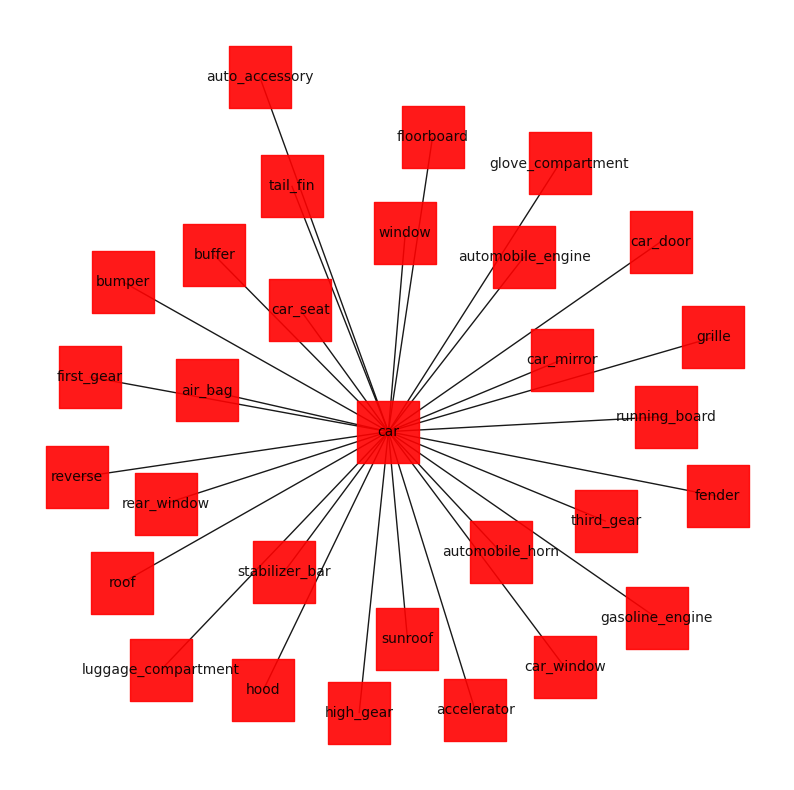

In [46]:
plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx(G,with_labels=True,node_size=2000,
                 font_size=10,
                 node_shape='s',
                 alpha=0.9,
                 node_color='red')


Можно посчитать близость между синсетами (зависит от того, какой путь нужно пройти по этим связям от одного объекта до другого и есть ли он вообще)

In [47]:
car = wn.synsets('car')[0]
bike = wn.synsets('bike')[0]
window = wn.synsets('window')[0]

In [48]:
bike.path_similarity(car)

0.3333333333333333

In [49]:
bike.path_similarity(window)

0.09090909090909091

Есть и другие метрики:

In [50]:
(wn.lch_similarity(bike, car),
wn.lch_similarity(bike, window))

(2.538973871058276, 1.2396908869280152)

In [51]:
(wn.wup_similarity(bike, car), wn.wup_similarity(bike, window))

(0.9166666666666666, 0.5)

### использование WordNet для WSD

Датасеты для обучения и оценки WSD моделей обычно используют смыслы из WordNet. Например, http://lcl.uniroma1.it/wsdeval/ Там очень много данных, поэтому я взял небольшой кусок

In [52]:
corpus_wsd = []
corpus = open('data/corpus_wsd_50k.txt').read().split('\n\n')
for sent in corpus:
    corpus_wsd.append([s.split('\t') for s in sent.split('\n')])

Корпус состоит из предложений, где у каждого слова три поля - значение, лемма и само слово. Значение пустое, когда слово однозначное, а у многозначных слов стоит тэг вида **'long%3:00:02::'** Это тэг wordnet'ного формата

In [53]:
corpus_wsd[0]

[['', 'how', 'How'],
 ['long%3:00:02::', 'long', 'long'],
 ['', 'have', 'has'],
 ['', 'it', 'it'],
 ['be%2:42:03::', 'be', 'been'],
 ['', 'since', 'since'],
 ['', 'you', 'you'],
 ['review%2:31:00::', 'review', 'reviewed'],
 ['', 'the', 'the'],
 ['objective%1:09:00::', 'objective', 'objectives'],
 ['', 'of', 'of'],
 ['', 'you', 'your'],
 ['benefit%1:21:00::', 'benefit', 'benefit'],
 ['', 'and', 'and'],
 ['service%1:04:07::', 'service', 'service'],
 ['program%1:09:01::', 'program', 'program'],
 ['', '?', '?']]

Вот так можно достать соответствующий этому тэгу синсет:

In [54]:
wn.lemma_from_key('program%1:09:01::').synset()#.definition()

Synset('program.n.02')

### Алгоритм Леска

Как теперь разрешить предсказать правильный смысл для каждого такого случая? Классический способ это сделать - алгоритм Леска, который основан на уже существующей базе значений и их определений (например, на wordnet). Алгоритм у него достаточно простой: 1) для неоднозначного слова находятся определения всех его значений; 2) выбирается контекст, в котором встретилось неоднозначное слово - обычно это какое-то окно вокруг слова (5 слов слева + 5 слов справа); 3) контекст сравнивается с каждым из определений и выбирается значение с наибольшей близостью к контексту. 


Сама имплементация этого алгоритма будет вашим домашним заданием, но мы разберем ключевой пункт этого алгоритма - расчет близости контекста и определения.

Рассмотрим несколько способов.

## Пересечение слов

Самый простой способ - это просто посчитать общие слова. Чем больше общих слова - тем более похожи определение и контекст. Такое удобно написать через множества (set) в питоне

In [55]:
definition1 = 'a system of projects or services intended to meet a public need'
definition2 = '(computer science) a sequence of instructions that a computer can interpret and execute'
context = 'i wrote a computer _ that predicts the sense of a word' # само слово не program не используем

In [56]:
(set(definition1.split()) & set(context.split()))

{'a', 'of'}

In [57]:
(set(definition2.split()) & set(context.split()))

{'a', 'computer', 'of', 'that'}

Можно еще конечно почистить от стоп-слов, но уже видно, что это как-то работает. Единственный недостаток такого подхода в том, что он зависит от длины текстов. Можно представить ситуацию, где определение состоит из трех слов и все они есть в контексте, но при этом в другом определении, состоящим из 30 слов, есть 4 пересечения. Хотелось бы метрику, которая устраняет влияние длины текста.

## Jaccard

Пример такой метрики - метрика Жаккара (Jaccard). В ней к пересечению еще добавляется объединение и итоговое значение - это отношение пересечения к объединению. Логика тут в том, чтобы оценить какая доля слов пересекается. Значение будет от 0 до 1, так как пересечение в худшем случае равно 0, а в лучшем равно объединению. 

In [58]:
definition1 = 'a system of projects or services intended to meet a public need'
definition2 = '(computer science) a sequence of instructions that a computer can interpret and execute'
context = 'i wrote a computer _ that predicts the sense of a word'

intersection1 = (set(definition1.split()) & set(context.split()))
union1 = (set(definition1.split()) | set(context.split()))
jaccard1 =  len(intersection1) / len(union1)

intersection2 = (set(definition2.split()) & set(context.split()))
union2 = (set(definition2.split()) | set(context.split()))
jaccard2 =  len(intersection2) / len(union2)

In [59]:
jaccard1, jaccard2

(0.1, 0.21052631578947367)

### Косинусная близость

Другая метрика, которую нужно разобрать - косинусная близость (или косинусное расстояние). В каком-то смысле это то же самое, что и Жаккар, но обобщенное на работу с векторами. Саму векторизацию мы пока пропустим и представим, что они у нас уже есть.

Есть геометрическое объяснение косинусного расстояния/близости: угол между двумя одинаковыми векторами равен 0, а косинус 0 - равен 1; угол между перпендикулярными векторами векторами равен 90 градусов, а косинус - 0; угол между векторами направленными в противоположные стороны равен 180, а косинус -1. 

Картинка для примера:

In [61]:
from IPython.display import Image
from IPython.core.display import HTML 

![](https://i.ibb.co/2qFsPLQ/Screenshot-2022-11-16-at-15-36-40.png)

Допустим в нашем словаре 2 слова: Hi и Mark. На графике изображены три текста: "Hi", "Mark", "Hi Mark". Между Hi и Mark нет ничего общего, они перпендикулярны, поэтому их близость равна 0, а между Hi Mark и Mark уже есть общее, поэтому близость будет ненулевая. 

Но геометрическое объяснение сложновато обобщить на реальные примеры. Уникальных слов обычно сильно больше 2 и, соответственно, нужно к графику выше мысленно добавлять еще сотни или даже тысячи размерностей. Нарисовать такое или даже представить сложновато. 

Поэтому давайте лучше посмотрим на алгебраическую интерпретацию.

Формула вот такая:

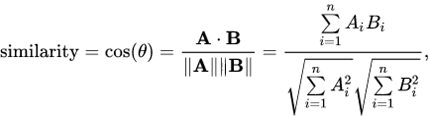

В числителе (вверху) здесь скалярное произдведение - это такая операция с векторами, когда числа, стоящие в двух векторах напротив друг друга перемножаются, а результат складывается. 

В знаменателе (внизу) тут произведение длин векторов, а длина вектора считается как произведение корней из суммы квадратов значений в первом и втором векторах.

Вот пошаговая визуализация расчета близости для двух векторов с абсолютными частотностями. Вектора 1 и 2 здесь это представление двух текстов мешком слов - это такой метод, который показывает какие слова из словаря встречаются в каждом из текстов и в каком количестве, но порядок слов при этом теряется. В этом примере в словаре 6 уникальных слов, поэтому размерность векторов - 6. Каждая из размерностей показывает частотность каждого из слов в словаре в конкретном тексте. Можно увидеть, что первому вектору соответствует текст из 3 слов, которые встретились по 1 разу, а второму вектору соответствует текст тоже из 3 уникальных слов, два из которых такие же как и в первом тексте, но первое с другой частотностью.

![](https://i.ibb.co/Qn87BXW/Screenshot-2022-11-16-at-15-46-54.png)

Выглядит наверное сложно, но важно понять, что тут происходит. 

Вверху (скалярное произведение) по сути происходит поиск общих слов в первом и втором векторе (=тексте). Если слово есть в одном тексте, а в другом нет - то результат произведения будет нулевой. Чем больше пересечений, тем больше будет итоговое скалярное произведение. **Чем больше значение скалярного произведения, тем больше будет итоговая близость.**

Внизу - просто нормализация. Результат скалярного произведения может быть любым (отрицательным, положительным, большим, маленьким), деление на длину вектора приводит итоговую метрику в удобный интервал от -1 до 1 (а в нашем случае без отрицательных значений от 0 до 1). 



Можно заметить, что это очень похоже на Жаккара. И для этих векторов (посчитанных мешком слов) мы смогли бы посчитать и Жаккара - пересечение это количество ненулевых размерностей, которые есть в обоих векторах, а объединение - это сумма ненулевых размерностей в обоих векторах. Но косинусное расстояние подходит еще и для векторов, которые построены не напрямую из слов. Это могут быть вектора из трансформерной модели, где каждая размерность может принимать как отрицательные так и положительные значений и как правило нулевых размерностей там нет. 

В таких скалярное произведение будет штрафовать пары значений с разными знаками (будет получаться отрицательное число и сумма будет уменьшаться)

In [66]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
import numpy as np

In [67]:
cosine_similarity(np.array([[1,1,1,0,0,0]]),
                  np.array([[3,0,1,1,0,0]]))

array([[0.69631062]])

## Sentence transformers

Давайте посмотрим как считать близость между реальными векторами текстов. Для этого забежим вперед и возьмем предобученную трансформерную модель, которая умеет создавать эмбеддинг для небольшого текста. 

Модель возьмем из библиотеки [sentence_transformers](https://www.sbert.net/index.html). Это библиотека содержит большое количество моделей, которые предназначены для построение эмбединнгов текстов. Многие из них - специально обученые производить хорошие эмбединги, между которыми удобно рассчитывать близость. На сайте библиотеки есть раздел с лидербордом по моделям. Мы возьмем лучшую (по усредненному скору) модель - `all-mpnet-base-v2`.

In [41]:
# библиотеки могут заработать не сразу
# можете попробовать установить более новую версию питона если инсталлов ниже не хватает

In [45]:
# !python -m pip install torch torchvision torchaudio
# !python -m pip install sentence_transformers transformers accelerate -U

In [68]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sentence_transformers import SentenceTransformer

/Users/mnefedov/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Интерфейс у модели достаточно простой, есть функция encode, которая сама предобрабатывает текст и превращает его в 1 вектор

In [69]:
# embedding model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embed = model.encode

Рассчитаем вектора для определений и контекста, которые мы использовали выше

In [70]:
definition1 = 'a system of projects or services intended to meet a public need'
definition2 = '(computer science) a sequence of instructions that a computer can interpret and execute'
context = 'i wrote a computer _ that predicts the sense of a word'

In [71]:
definition1_emb = embed(definition1)
definition2_emb = embed(definition2)
context_emb = embed(context)

Посмотрим на получившийся вектор. В нем 768 не очень больших, положительных и отрицательных чисел

In [72]:
context_emb.shape

(768,)

In [73]:
context_emb

array([ 2.60698218e-02,  2.81298477e-02, -2.86605190e-02,  2.73304861e-02,
       -2.03045439e-02, -2.45557409e-02, -3.44662112e-03,  1.29649490e-02,
        3.22340652e-02, -1.32161723e-02,  3.78280804e-02, -4.27399129e-02,
        1.42524373e-02,  8.37171897e-02,  3.09127197e-02,  1.17424317e-02,
        6.91081509e-02,  1.30820088e-02, -1.07209291e-02, -2.10682768e-03,
        4.95721819e-03, -1.02010067e-03, -5.77506796e-03,  4.73414510e-02,
       -3.00503951e-02, -3.59182619e-02, -2.45586541e-02, -2.17194371e-02,
       -2.08961442e-02, -2.29210295e-02, -2.80032773e-02,  1.52165880e-02,
       -1.65842399e-02,  4.57604751e-02,  1.44828778e-06, -5.61360121e-02,
       -3.94318067e-02, -1.73282530e-02,  1.10614831e-02, -2.93712262e-02,
        8.55174810e-02,  3.19165215e-02,  4.22132388e-03, -2.52291746e-03,
       -6.43932298e-02,  4.01509702e-02,  4.70007323e-02, -4.48253751e-02,
       -1.41516014e-03,  3.66890095e-02, -8.11714679e-03, -4.46258783e-02,
        2.88627129e-02,  

In [74]:
# для наглядности
context_emb.round(3)

array([ 0.026,  0.028, -0.029,  0.027, -0.02 , -0.025, -0.003,  0.013,
        0.032, -0.013,  0.038, -0.043,  0.014,  0.084,  0.031,  0.012,
        0.069,  0.013, -0.011, -0.002,  0.005, -0.001, -0.006,  0.047,
       -0.03 , -0.036, -0.025, -0.022, -0.021, -0.023, -0.028,  0.015,
       -0.017,  0.046,  0.   , -0.056, -0.039, -0.017,  0.011, -0.029,
        0.086,  0.032,  0.004, -0.003, -0.064,  0.04 ,  0.047, -0.045,
       -0.001,  0.037, -0.008, -0.045,  0.029,  0.021,  0.057, -0.001,
        0.006,  0.022,  0.034, -0.059, -0.031,  0.01 , -0.022,  0.027,
        0.051,  0.022,  0.026, -0.062, -0.005, -0.022,  0.002, -0.035,
       -0.012,  0.029, -0.04 , -0.026,  0.011, -0.012, -0.019, -0.023,
        0.062,  0.011, -0.011,  0.004, -0.004,  0.084, -0.002, -0.034,
        0.012,  0.023,  0.011, -0.016,  0.056,  0.001, -0.009,  0.026,
       -0.027, -0.023,  0.009, -0.077,  0.036,  0.012,  0.059,  0.036,
       -0.017, -0.006,  0.015,  0.02 , -0.073,  0.027, -0.081, -0.021,
      

Рассчитаем косинусную близость с помощью функции из sklearn

In [75]:
cosine_distances(context_emb, definition1_emb)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.60698218e-02  2.81298477e-02 -2.86605190e-02  2.73304861e-02
 -2.03045439e-02 -2.45557409e-02 -3.44662112e-03  1.29649490e-02
  3.22340652e-02 -1.32161723e-02  3.78280804e-02 -4.27399129e-02
  1.42524373e-02  8.37171897e-02  3.09127197e-02  1.17424317e-02
  6.91081509e-02  1.30820088e-02 -1.07209291e-02 -2.10682768e-03
  4.95721819e-03 -1.02010067e-03 -5.77506796e-03  4.73414510e-02
 -3.00503951e-02 -3.59182619e-02 -2.45586541e-02 -2.17194371e-02
 -2.08961442e-02 -2.29210295e-02 -2.80032773e-02  1.52165880e-02
 -1.65842399e-02  4.57604751e-02  1.44828778e-06 -5.61360121e-02
 -3.94318067e-02 -1.73282530e-02  1.10614831e-02 -2.93712262e-02
  8.55174810e-02  3.19165215e-02  4.22132388e-03 -2.52291746e-03
 -6.43932298e-02  4.01509702e-02  4.70007323e-02 -4.48253751e-02
 -1.41516014e-03  3.66890095e-02 -8.11714679e-03 -4.46258783e-02
  2.88627129e-02  2.14875322e-02  5.65630905e-02 -7.84595497e-04
  5.81797073e-03  2.19479930e-02  3.44445705e-02 -5.85746728e-02
 -3.14422958e-02  9.82948206e-03 -2.18723919e-02  2.72080936e-02
  5.10382317e-02  2.24636886e-02  2.58076135e-02 -6.15553632e-02
 -5.12521435e-03 -2.24703439e-02  2.49777525e-03 -3.52916494e-02
 -1.16497511e-02  2.93239225e-02 -3.97467799e-02 -2.59171724e-02
  1.10591333e-02 -1.20284408e-02 -1.90009307e-02 -2.27707140e-02
  6.18729293e-02  1.14581147e-02 -1.07487608e-02  4.07131389e-03
 -3.67225497e-03  8.43563974e-02 -2.39401171e-03 -3.37652378e-02
  1.20446375e-02  2.25452036e-02  1.10170078e-02 -1.64049733e-02
  5.59397414e-02  1.17085408e-03 -9.31884442e-03  2.62643099e-02
 -2.74639204e-02 -2.27502342e-02  8.93260911e-03 -7.66404942e-02
  3.55793647e-02  1.20695941e-02  5.86611852e-02  3.63901407e-02
 -1.65351536e-02 -5.73399523e-03  1.45408083e-02  1.96258686e-02
 -7.27106705e-02  2.72692945e-02 -8.13956857e-02 -2.11496223e-02
 -3.26965787e-02  7.29898661e-02  3.90958004e-02 -4.96897995e-02
 -6.63388520e-02 -1.01196785e-02  6.42234110e-04 -1.88011937e-02
 -1.35783004e-02  1.69790797e-02 -9.91976447e-03  2.28154901e-02
 -4.12469655e-02 -3.77092585e-02 -7.57177966e-03  2.83327829e-02
 -3.02904081e-02 -2.85166521e-02  2.07434408e-02  2.25604102e-02
 -9.28366743e-03 -1.51148550e-02 -8.98454711e-03  6.70140386e-02
 -1.28545528e-02 -5.78452423e-02  2.47774716e-03 -7.97297210e-02
 -2.81680487e-02 -2.84211561e-02 -3.25451605e-02 -6.56163916e-02
 -2.47204304e-02  2.01430153e-02  1.01629104e-02 -5.48636951e-02
  8.94645415e-03  4.05955613e-02 -4.44052666e-02  1.02671094e-01
 -7.56808445e-02  1.26552191e-02  1.37870759e-03 -1.13331610e-02
  1.51405605e-02  2.56872121e-02 -5.24982577e-03  4.51805554e-02
  4.59146500e-02  5.85040031e-03  6.26491010e-03  7.20552355e-03
 -5.88717498e-02 -1.00636028e-01 -6.11553639e-02 -1.08829793e-02
 -5.83557896e-02  4.36093509e-02 -3.92435715e-02  4.10913117e-02
  5.64266695e-03  5.37047796e-02  2.42958870e-02  1.05013341e-01
  6.05126023e-02  2.84900405e-02  5.55243343e-03 -3.09708677e-02
 -1.55447396e-02 -1.46294525e-02 -1.43786808e-02 -3.49356583e-03
 -8.83706957e-02  2.19522533e-03 -2.93946713e-02 -2.35651731e-02
  1.60144493e-02 -5.43736331e-02 -3.02928686e-02 -7.79137388e-03
  1.89318918e-02 -3.13578434e-02  4.60175462e-02 -5.50661329e-03
 -1.92169286e-02 -4.88134846e-02  8.63950327e-03 -4.77152206e-02
  2.17958596e-02 -4.88891415e-02  7.63863921e-02  1.30082801e-01
  3.28815132e-02 -5.33934757e-02  8.30224156e-02  7.57143786e-03
 -2.32078079e-02  4.61316667e-02  2.62386724e-02  1.36163952e-02
 -4.62060124e-02 -2.14044917e-02 -1.82300340e-02  2.83757988e-02
  1.28800049e-02  2.15108320e-02 -4.15295316e-03  3.15550715e-02
  1.82425193e-02 -3.74761783e-02  2.08042599e-02  2.08608638e-02
 -2.82969582e-03 -5.35163693e-02 -4.71887924e-02  1.35966148e-02
  1.38236517e-02  9.01749451e-03 -3.65395634e-03  5.73994406e-02
  2.57572643e-02 -2.01231288e-03 -5.14804982e-02 -2.00651996e-02
 -4.66602743e-02  3.39640491e-02  1.17060877e-02 -5.82823381e-02
  2.77181976e-02  3.31476741e-02  6.75387084e-02  1.22632720e-02
  5.67695573e-02 -6.65890351e-02  5.69645837e-02 -7.09204227e-02
  3.76803316e-02 -1.43325506e-02  4.47984412e-02  7.28083262e-03
  2.85710525e-02  1.60099193e-02  3.72759588e-02 -2.62777619e-02
 -2.46259775e-02 -2.06305142e-02  3.72269400e-03 -4.67101932e-02
  8.38316046e-03 -1.35120340e-02  3.39613184e-02  3.49284639e-03
  4.99469740e-03 -2.49034651e-02  7.93756684e-04 -3.46210748e-02
 -4.31761295e-02  3.18461955e-02 -4.72942693e-03  1.70705207e-02
 -2.31330041e-02 -4.39917296e-03  1.13312835e-02  2.25792304e-02
  3.83137427e-02 -1.36187272e-02  1.68776941e-02  3.40576433e-02
 -3.42961811e-02 -2.40256041e-02 -4.41743769e-02 -3.07683256e-02
 -4.96942364e-02  5.87186851e-02  3.34628783e-02 -3.17159891e-02
 -7.49716908e-03  3.18871140e-02 -2.39836741e-02  2.70108413e-02
  2.77621914e-02 -4.32922393e-02  2.50458587e-02 -2.90878434e-02
 -5.16472152e-03 -3.24384472e-03  1.94145571e-02  4.15609628e-02
  4.53335047e-02 -4.18853574e-03  8.84144194e-03 -3.26370485e-02
  2.16128072e-03  2.40324605e-02  5.22514544e-02 -3.98226231e-02
 -4.63362671e-02  3.35683711e-02  8.99985284e-02  2.09510010e-02
 -3.21147814e-02  4.97947969e-02 -5.90330251e-02 -3.41109037e-02
 -7.22305775e-02 -1.34600000e-02 -4.47860658e-02  6.01749793e-02
 -3.98626877e-03 -5.05394228e-02  8.97321925e-02 -7.15908594e-04
  1.99675784e-02  3.08210007e-03 -2.99170930e-02  2.10373513e-02
  7.66326264e-02 -2.41140965e-02  1.48943998e-02  2.33426181e-04
 -3.57109196e-02 -2.00601518e-02 -2.78608315e-02  3.36323380e-02
 -6.52984530e-02  2.57371180e-03 -2.62749828e-02  2.23488696e-02
  1.96564291e-02  2.94369254e-02 -1.44276079e-02 -2.28903387e-02
 -7.76160806e-02  1.66614738e-03  8.07723328e-02  3.26536857e-02
 -2.33838744e-02  4.45029214e-02  1.28065897e-02  1.65519882e-02
 -5.23460913e-04 -2.67643388e-02 -2.80446764e-02 -1.69685856e-02
 -1.78932007e-02 -2.25125086e-02 -3.50898737e-03 -9.78186727e-03
  7.08917342e-03  1.03520127e-02 -4.23031077e-02 -1.43829351e-02
 -8.08088332e-02  2.69559193e-02  2.88853645e-02 -3.09571344e-02
 -3.26543115e-02  2.75600888e-03  1.02422507e-02 -2.35672370e-02
 -2.33161952e-02  5.81696443e-02  2.19720379e-02 -1.17143579e-02
  1.01173697e-02 -2.66879774e-03 -6.03606999e-02 -2.37951963e-03
  1.21415947e-02 -4.11002785e-02 -4.51718643e-02 -1.60665438e-02
  2.70442329e-02  3.09808049e-02 -3.05432640e-02  3.15627269e-03
 -6.68478087e-02 -1.29532078e-02 -4.91548982e-03 -3.23550366e-02
 -3.58997062e-02 -4.72941846e-02 -1.03332838e-02  4.78709320e-04
 -7.98223764e-02  4.37410027e-02  2.22243764e-03  4.04255763e-02
  6.82341261e-03 -1.96470395e-02  3.53155583e-02  2.63391919e-02
  3.70173156e-02 -7.35288626e-03  1.09556705e-01  5.15762307e-02
 -5.43019585e-02 -4.83204834e-02 -5.97818382e-02 -5.58759226e-03
  6.76242933e-02 -1.12660602e-02  4.74265888e-02 -6.16932334e-03
 -8.67328607e-03 -1.69603787e-02 -1.58699770e-02 -6.41137064e-02
 -4.75616902e-02  1.82289556e-02  6.15704805e-02 -1.81177109e-02
 -4.63466831e-02 -1.21487109e-02  3.53392959e-02  1.43154105e-02
 -1.51320291e-03 -4.43292595e-02  8.88504670e-04 -3.44143882e-02
 -1.51214506e-02  7.00256601e-03 -2.48292251e-03 -6.46389648e-02
 -5.57476319e-02  7.15370290e-03  7.20421830e-03 -8.45417902e-02
 -1.68811549e-02  6.69204339e-04  4.24135029e-02  9.27103311e-03
  5.17639751e-03  1.82485580e-02  1.43265342e-02 -1.22386374e-01
 -1.10515645e-02  2.88278796e-02  6.96114823e-02 -4.52437177e-02
 -3.79774603e-03  1.01903826e-02 -6.72449823e-03 -2.29706112e-02
  6.06020205e-02  7.16587296e-03 -2.32902411e-02  4.78281453e-02
  4.67650741e-02  3.98564413e-02 -5.32545075e-02 -1.64169371e-02
  8.58919229e-04  5.65909268e-03  3.52775827e-02 -2.19531246e-02
  1.59286782e-02  1.41221480e-02 -2.00276263e-02 -9.17225052e-03
 -7.49452598e-03  2.47107074e-02 -2.48925807e-03 -9.48607083e-03
  4.92537022e-03 -2.19699461e-02 -6.24688491e-02  2.18430348e-02
  2.42757928e-02  5.86127490e-02 -5.02397530e-02  3.77095747e-03
 -1.80245377e-02 -2.82009412e-02 -2.79995296e-02 -1.48973102e-02
 -3.07538291e-03 -2.61212438e-02  2.79022120e-02 -2.04360043e-03
 -2.52628345e-02 -3.60018723e-02 -3.50773856e-02 -4.76167053e-02
  1.70150248e-03  5.43572828e-02  5.06276041e-02  4.04568724e-02
  1.00103104e-02 -2.36804318e-02  1.92706864e-02  5.35513368e-03
 -1.91527940e-02  2.40953616e-03 -2.84319706e-02  2.67460831e-02
 -2.68261321e-02  1.71120595e-02 -1.85380075e-02  5.52695571e-03
 -3.09624989e-02 -3.61106992e-02 -4.97022010e-02  6.04570806e-02
  1.61242466e-02 -4.77947406e-02 -3.17425579e-02 -7.21793203e-03
  2.30332501e-02 -1.35370353e-02  6.81777820e-02 -2.20570136e-02
  1.39310621e-02 -7.71874189e-03  1.99044012e-02  5.11280913e-03
 -7.50670806e-02  3.81815396e-02 -8.49778503e-02  1.39643122e-02
  1.07679134e-02 -6.52925149e-02 -1.85855441e-02  2.07401384e-02
  4.84865671e-03  3.73609513e-02 -3.75557318e-02  1.61508583e-02
 -4.15057316e-02 -3.32205854e-02  5.85096516e-02  4.62736003e-02
  5.73100299e-02  2.75435597e-02  4.90287840e-02  5.45493551e-02
 -6.84356270e-03 -4.08428209e-03 -3.86421122e-02  2.65611336e-02
 -2.24671550e-02  1.40256258e-02  3.93021060e-03 -4.97294612e-33
 -3.59436534e-02 -5.74628450e-02 -1.62864961e-02  9.00258683e-03
  1.60071831e-02 -1.28746196e-03 -1.16925128e-02  5.32273240e-02
  1.11453030e-02 -1.07059851e-02 -2.21117935e-03  1.72308157e-03
  2.94323675e-02 -2.58767828e-02  4.24534418e-02  1.73521005e-02
 -1.25585599e-02  9.55469068e-03  1.68609340e-02 -8.00950453e-02
  1.16722658e-02  2.90283263e-02  7.11322576e-02 -4.01583239e-02
  1.51639536e-03  1.55115994e-02 -3.80987935e-02 -1.73639115e-02
  7.47088483e-03  2.56600138e-02 -1.90734752e-02  9.33269262e-02
  8.26804433e-04  3.29674818e-02 -1.44454148e-02  2.23381296e-02
 -9.78797767e-03 -5.95428608e-02  2.51312535e-02  7.84728210e-03
 -3.35631780e-02  2.06995234e-02  2.14453712e-02 -3.03651914e-02
 -3.38789038e-02  3.42656523e-02  8.02799910e-02 -2.27103010e-02
 -1.45140821e-02  1.35908918e-02 -3.66875380e-02  5.68333222e-03
  1.32125150e-02 -3.84590849e-02  2.29348298e-02 -3.02356817e-02
  5.74900117e-03 -6.41770735e-02 -3.17523703e-02  4.55486067e-02
 -1.53187104e-02  3.03061791e-02  6.04593903e-02  1.04118455e-02
  2.54261047e-02  5.37068173e-02  8.20453316e-02 -4.19955747e-03
  6.58353837e-03  6.83023036e-03  3.24908681e-02  1.74423046e-02
  6.07533343e-02  8.56453627e-02  4.81056720e-02 -9.37993005e-02
  4.93357293e-02  2.36238702e-04  1.70229264e-02  3.32530253e-02
  3.10481526e-02  2.79910546e-02 -2.56981365e-02 -3.17144021e-02
  1.03423344e-02 -1.64685771e-02 -4.46704030e-02 -4.09625843e-02
  1.29444366e-02  2.18622212e-04  1.89386569e-02  2.98334211e-02
 -3.28490064e-02 -4.15589660e-02  2.17366982e-02 -2.91569438e-02
 -3.56764579e-03 -4.43823822e-03 -1.84461959e-02  5.87965641e-03
  1.65849105e-02 -3.31492983e-02 -2.50570737e-02  2.18881927e-02
  3.69399078e-02  4.92958492e-03 -5.22426218e-02  1.24047557e-02
 -5.31707816e-02 -2.49955691e-02  7.60606898e-04 -4.11681794e-02
  4.60143276e-02 -2.12279838e-02  2.31682584e-02 -4.59493548e-02
 -1.29493885e-02  1.74551725e-03 -4.47843410e-03  3.03012598e-02
 -3.20938304e-02 -5.02362587e-02 -1.07084941e-02  6.86716568e-03
 -5.05223460e-02  6.73036603e-03 -1.80893894e-02  3.50810513e-02
  5.49725369e-02 -1.24864075e-02 -7.71613093e-03  1.99219435e-02
  2.18156742e-07  4.85302433e-02  5.60069308e-02 -2.00262796e-02
  5.47962189e-02 -2.99007408e-02 -1.53709305e-02  3.61850788e-03
  7.77627993e-03 -9.64163896e-03 -1.96540281e-02  5.73287345e-03
  7.15567125e-03  8.37495830e-03  2.20809635e-02 -4.68556508e-02
 -2.16812715e-02  2.27467660e-02  3.64911892e-02 -7.91418273e-03
  2.46194955e-02  9.09671187e-02  9.61854532e-02  5.92731386e-02
 -1.38592189e-02 -6.40718546e-03 -5.35838157e-02 -1.11716269e-02
 -1.05274124e-02  3.35113667e-02 -2.62926128e-02  3.67870964e-02
 -7.31058046e-03  2.26461738e-02  8.51115137e-02 -2.73483600e-02
 -4.49619144e-02  8.26552361e-02  2.72789039e-02 -2.61984430e-02
  6.16996139e-02 -9.19301121e-04 -2.93135475e-02  1.78986858e-03
 -1.66345071e-02  1.99334994e-02  2.98924576e-02  3.50755490e-02
 -1.89114455e-02 -3.96314226e-02 -5.20483241e-04  5.12181967e-02
 -1.46389212e-02  8.99127778e-03 -3.68655310e-03  7.81540107e-03
  2.73975525e-02 -2.42043361e-02 -3.49382218e-03 -6.62653754e-03
  3.11316848e-02 -3.71047780e-02  3.21057232e-05  1.61609538e-02
 -5.71105368e-02  1.29826050e-02 -6.20197281e-02 -2.54406203e-02
  1.13652051e-34  4.66181431e-03  2.03389674e-02 -2.14782078e-03
 -1.75573174e-02  2.12788004e-02  1.70300398e-02  7.33859688e-02
  1.07081737e-02  3.89474891e-02 -2.34981254e-02 -5.90743944e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [154]:
# context_emb.reshape(4, 768//2).shape

Сначала у нас будет ошибка, потому что эта функция ожидает двумерные массивы. А у нас два одномерных вектора. Но это можно поправить функцией reshape - она превратит вектор с размерностью (768) в массив с размерностью (1, 768)

In [76]:
cosine_distances(context_emb.reshape(1, -1), definition1_emb.reshape(1, -1))[0][0]

0.8994294

In [77]:
cosine_distances(context_emb.reshape(1, -1), definition2_emb.reshape(1, -1))

array([[0.68179756]], dtype=float32)

In [78]:
cosine_distances(context_emb.reshape(1, -1), np.array([definition1_emb, definition2_emb]))

array([[0.8994294 , 0.68179756]], dtype=float32)

Вместо расстояния можно рассчитать близость (то же самое только вычтенное из единицы). Еще при работе с векторами удобно (и быстрее) считать близость не по одному вектору, а между всеми сразу.

In [79]:
cosine_similarity(context_emb.reshape(1, -1), [definition1_emb, definition2_emb])

array([[0.10057064, 0.31820244]], dtype=float32)

# WSI

WSI можно представить как задачу кластеризации контекстов, в которых встречается слово.

Кластеризация - задача разбиения объектов на группы (кластеры). Кластеризация это задача обучения без учителя. 

Основное предположение в кластеризации - объекты, близкие в признаковом пространстве, близки на самом деле. Все алгоритмы кластеризации так или иначе вычисляют близость между объектами (это может быть, например, косинусное расстояние) и стараются организовать кластеры так, чтобы между объектами одного кластера было небольшое расстояние.

Так как считать близости между всеми объектами может быть долго, данные могут распологаться в пространстве странным образом (без четких границ, например) или иметь выбросы, в конкретных алгоритмах кластеризации используются дополнительные предположения и разные трюки. Часто к ним привязывается гиперпараметр(ы), который нужно настраивать самому. Сделать это обычно непросто из-за того, что у нас нет конкретного критерия качества, а сами параметры могут быть непонятными. 

Возьмем данные диалоговского соревнования 2018 года - https://github.com/nlpub/russe-wsi-kit/blob/initial/data/main/wiki-wiki/train.csv (только train часть для простоты)

В данных примеры использования целевых слов и индексы значений, в которых они использованы

В качестве метрики используется Adjusted Rand Index. https://en.wikipedia.org/wiki/Rand_index , http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html  
Это специальная метрика для кластеризации. Ее нужно использовать, потому что нельзя напрямую сравнить индекс кластера и индекс значения. Индексы значений проставлены в случайном порядке и индексы кластеров тоже рассчитываются случайно. Поэтому нужно проверять то, что два контекста находятся в одном кластере и одном значении или разных кластерах и разных значениях, все остальные случаи - ошибка.  ARI именно это и считает, плюс там есть нормализация, которая позволяет исключить, что случайная кластеризация получит хорошие метрики.

In [63]:
# !pip install pandas

Посмотрим на данные

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/nlpub/russe-wsi-kit/initial/data/main/wiki-wiki/train.csv', sep='\t')

In [82]:
df.head(100)

,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,замок,1,NaN,"0-5, 339-344",замок владимира мономаха в любече . многочисле...
1,2,замок,1,NaN,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный..."
2,3,замок,1,NaN,299-304,проведения архитектурно - археологических рабо...
3,4,замок,1,NaN,111-116,"топи с . , л . белокуров легенда о завещании м..."
4,5,замок,1,NaN,"134-139, 262-267",великий князь литовский гедимин после успешной...
...,...,...,...,...,...,...
95,96,замок,1,NaN,"163-168, 213-218, 364-369",без каминов и очагов . у входа в башню было по...
96,97,замок,1,NaN,"221-226, 276-281",v . в том сражении шотландцы потерпели сокруши...
97,98,замок,1,NaN,"0-5, 16-21, 179-184",замок данноттар замок данноттар ( ) расположен...
98,99,замок,1,NaN,232-237,. благодаря поэме байрона заключение бонивара ...


С помощью функции groupby мы можем сделать словарь: слово, значения которого надо найти - всего его контексты и размеченные значения.

In [83]:
grouped_df = df.groupby('word')[['word', 'context', 'gold_sense_id']]

In [84]:

for key, _ in grouped_df:
    print(grouped_df.get_group(key), "\n\n")
    break

    word                                            context  gold_sense_id
383  бор  бор ( элемент ) бор — элемент тринадцатой груп...              1
384  бор  бор - углерод - кремний семейство сплавов на о...              1
385  бор  с большим выделением теплоты , образуется окси...              1
386  бор  это объясняется прежде всего тем , что у компл...              1
387  бор  совсем малочисленна . элементарный бор в приро...              1
388  бор  действующем при месторождении горно - химическ...              1
389  бор  b c ) . при нагревании в атмосфере кислорода и...              1
390  бор  собственных минералов бора в чужих минералах о...              1
391  бор  бор - углерод - кремний семейство сплавов на о...              1
392  бор  с другими галогенами с образованием тригалоген...              1
393  бор  и в стабильны и входят в состав природного бор...              1
394  бор  номером . обозначается символом b ( ) . в своб...              1
395  бор  и взаимные пере

Давайте рассмотрим несколько популярных алгоритмов кластеризации.

In [90]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
import numpy as np
from sklearn.metrics import adjusted_rand_score

from IPython.display import Image
from IPython.core.display import HTML

### DBSCAN

![](https://media.giphy.com/media/lCL2GQewp7fkk/giphy.gif)

DBSCAN - это density based алгоритм. Он работает итеративно и объединяет в кластеры объекты, которые лежат плотными кучками. Объекты, лежащие отдельно, считаются выбросами и не кластеризуются. 

Если более детально, то в DBSCAN есть два основных параметра - порог близости (epsilon) и минимальное количество объектов (min_samples). Вначале выбирают объекты, в радиусе epsilon от которых лежит больше min_samples объектов. Такие точки формируют кластеры и объекты попавшие в радиус добавляют в эти кластеры. Далее для каждого объекта попавшего в кластер находятся объекты, которые лежат в радиусе epsilon и они также добавляются в кластер (и так далее пока новых объектов не будет). Визуально DBSCAN похож на расспространение болезни передающейся по воздуху.

DBSCAN сам находит количество кластеров и умеет отфильтровывать выбросы. Параметрами можно настраивать объём окрестности и таким оброзом влиять на кластеры.

Интерактивная визуализация есть тут - https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### Affinity Propagation

![](http://www.ritchievink.com/img/post-14-affinity_propagation/preference_median.gif)

В AP хитрым образом ищутся "экземпляры", объекты в выборке, которые могут использоваться как прототипы. Ближайшие к прототипам объекты записываются в этот кластер.

Приемущества AP - не нужно подбирать количество кластеров.  
Недостатки - медленно и тратится много памяти, параметры не очевидные.

AffinityPropagation работает с не очень большими дасетами, поэтому код ниже может долго работать, когда выбран этот алгоритм.

### Agglomerative clustering

![](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/003-hierarchical-clustering-in-r/figures/002-agglomerative-clustering-cutree-cut-dendrogram-1.png)

В агломеративной кластеризации каждому объекту припывается свой кластер и потом ближайшие кластеры постепенно объединяются, пока не получится 1 кластер или не получится количество, заданное как параметр. 

### Kmeans

![](https://media.giphy.com/media/hgCM9JNzlqAr6/giphy.gif)

KMeans наверное самый известный алгоритм кластеризации. Выбирается количество кластеров, случайно раскидываются центры этих кластеров, объекты относятся к ближайшим кластерам, центры кластеров пересчитываются в среднее значение попавших в него объектов.

Более интерактивную версию можно посмотреть вот тут - https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

KMeans достаточно быстрый, но выбор количества кластеров часто очень не тривиальная проблема.

Про эти и другие алгоритмы можно подробнее почитать вот тут - https://scikit-learn.org/stable/modules/clustering.html

Теперь давайте попробуем решить нашу задачу с помощью алгоритмов кластеризации и sentence transformers

In [91]:
ARI = []

for key, _ in grouped_df:
    # вытаскиваем контексты
    texts = grouped_df.get_group(key)['context'].values

    # создаем пустую матрицу для векторов 
    X = np.zeros((len(texts), 768))

    # переводим тексты в векторы и кладем в матрицу
    for i, text in enumerate(texts):
        X[i] = embed(text)

    # выбираем один из алгоритмов
    # cluster = AffinityPropagation(damping=0.9)
    cluster = KMeans(3)
#     cluster = DBSCAN(min_samples=1, eps=0.1)
    
    cluster.fit(X)
    labels = np.array(cluster.labels_)+1 

    # расчитываем метрику для отдельного слова
    ARI.append(adjusted_rand_score(grouped_df.get_group(key)['gold_sense_id'], labels))
    
print(np.mean(ARI)) # усредненная метрика

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


0.05188338428331491
